# Diabetes_Data_Visualisation

In [11]:
## Importing important libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=30)
matplotlib.rcParams.update({'font.size': 28})
import math
import datetime as dt
import os
import sys

## Utility Functions

In [12]:

## Visulalization function 
def Visualize(dataset,List_of_count_to_print,title1,ylab,vx=50,vy=30,w=.80):
    df = dataset
    n = 0
    for i in List_of_count_to_print:
        filter1 = df['Country'] == i
        df = df[filter1]
        labels = df['Date']
        conf = df['Confirmed']
        Recov = df['Recovered']
        Death = df['Deaths']
        
        #high = max(conf)
        #low = min(conf)
        
        x = np.arange(len(labels))  # the x label locations 
        width = w  # the width of the bars
        fig, ax = plt.subplots(figsize=(vx,vy))
        rects1 = ax.bar(x - width, conf, width, label='confirmed')
        rects2 = ax.bar(x , Recov, width, label='Recovered')
        rects3 = ax.bar(x + width , Death, width, label='Death')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(ylab)
        ax.set_title(title1)
        ax.set_xticks(x)
        plt.xticks(rotation=90) 
        #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
        ax.set_xticklabels(labels)
        ax.legend()
        n  = n + 1
    
    
    plt.show()
    
## function to Check the List of Countries avaialable
def count_avalaible(dataframe,country_coul_rep = 'Country'):
    x = 0
    for i in set(dataframe.loc[:,country_coul_rep]):
        print(i,end=' | ')
        x = x + 1
        if(x > 6):
            x = 0
            print()
    print("\n\n##Total No of Countries = " + str(len(set(dataframe.loc[:,country_coul_rep]))))
    
    

## Loading Diabetes Data

In [13]:
Diabetes_Countires_Wise = pd.read_csv('../../Diabetes/NCD_RisC_Lancet_2016_DM_age_standardised_countries.csv')
Diabetes_Countires_Wise

,Country/Region/World,ISO,Sex,Year,Age-standardised diabetes prevalence,Lower 95% uncertainty interval,Upper 95% uncertainty interval
0,Afghanistan,AFG,Men,1980,0.044712,0.015339,0.094918
1,Afghanistan,AFG,Men,1981,0.046114,0.016883,0.093777
2,Afghanistan,AFG,Men,1982,0.047601,0.018745,0.094018
3,Afghanistan,AFG,Men,1983,0.049173,0.020375,0.093950
4,Afghanistan,AFG,Men,1984,0.050834,0.022269,0.093679
...,...,...,...,...,...,...,...
13995,Zimbabwe,ZWE,Women,2010,0.072249,0.043879,0.108806
13996,Zimbabwe,ZWE,Women,2011,0.072956,0.042840,0.112512
13997,Zimbabwe,ZWE,Women,2012,0.073752,0.041895,0.116488
13998,Zimbabwe,ZWE,Women,2013,0.074616,0.040434,0.121880


In [14]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity
Diabetes_Countires_Wise = Diabetes_Countires_Wise.rename(columns={'Country/Region/World': 'Country'})
count_avalaible(Diabetes_Countires_Wise,'Country')

Madagascar | Colombia | Marshall Islands | American Samoa | Croatia | Kenya | Bangladesh | 
Australia | Bolivia | Guinea Bissau | Myanmar | Puerto Rico | Tanzania | Costa Rica | 
Sierra Leone | Haiti | Poland | Slovakia | Sweden | Togo | Serbia | 
Italy | Israel | Burkina Faso | Hungary | Iran | Mauritania | Namibia | 
Ireland | Saint Lucia | Mauritius | Occupied Palestinian Territory | Albania | Belarus | Pakistan | 
Cameroon | Venezuela | United Kingdom | Lesotho | Finland | Tajikistan | Dominica | 
Morocco | Benin | Greece | Malawi | Nicaragua | Dominican Republic | Somalia | 
Micronesia (Federated States of) | Russian Federation | United States of America | United Arab Emirates | Ukraine | Kazakhstan | Estonia | 
Equatorial Guinea | Montenegro | Gambia | Kuwait | Suriname | Cote d'Ivoire | Philippines | 
Greenland | Panama | Saint Vincent and the Grenadines | Libya | Algeria | Armenia | Maldives | 
Palau | Slovenia | Sudan | Senegal | Turkey | Georgia | Malta | 
Cambodia | Cook Isl

In [15]:
## Analysing the data Structure

Country_to_look_for = 'India'
ylab = "ratio"
xlab = "Year"

filter1 = Diabetes_Countires_Wise['Country'] == Country_to_look_for
Diabetes_Countires_Wise_country_specific = Diabetes_Countires_Wise[filter1]
Diabetes_Countires_Wise_country_specific                 
#Diabetes_Countires_Wise  ## Uncomment this to view for all countires at once

,Country,ISO,Sex,Year,Age-standardised diabetes prevalence,Lower 95% uncertainty interval,Upper 95% uncertainty interval
2835,India,IND,Men,1980,0.036589,0.012934,0.078182
2836,India,IND,Men,1981,0.038088,0.014617,0.078115
2837,India,IND,Men,1982,0.039663,0.016398,0.078169
2838,India,IND,Men,1983,0.041308,0.018390,0.078709
2839,India,IND,Men,1984,0.043005,0.020178,0.078566
...,...,...,...,...,...,...,...
9865,India,IND,Women,2010,0.081243,0.054659,0.112790
9866,India,IND,Women,2011,0.081729,0.053318,0.115559
9867,India,IND,Women,2012,0.082231,0.051335,0.118902
9868,India,IND,Women,2013,0.082734,0.049554,0.122473


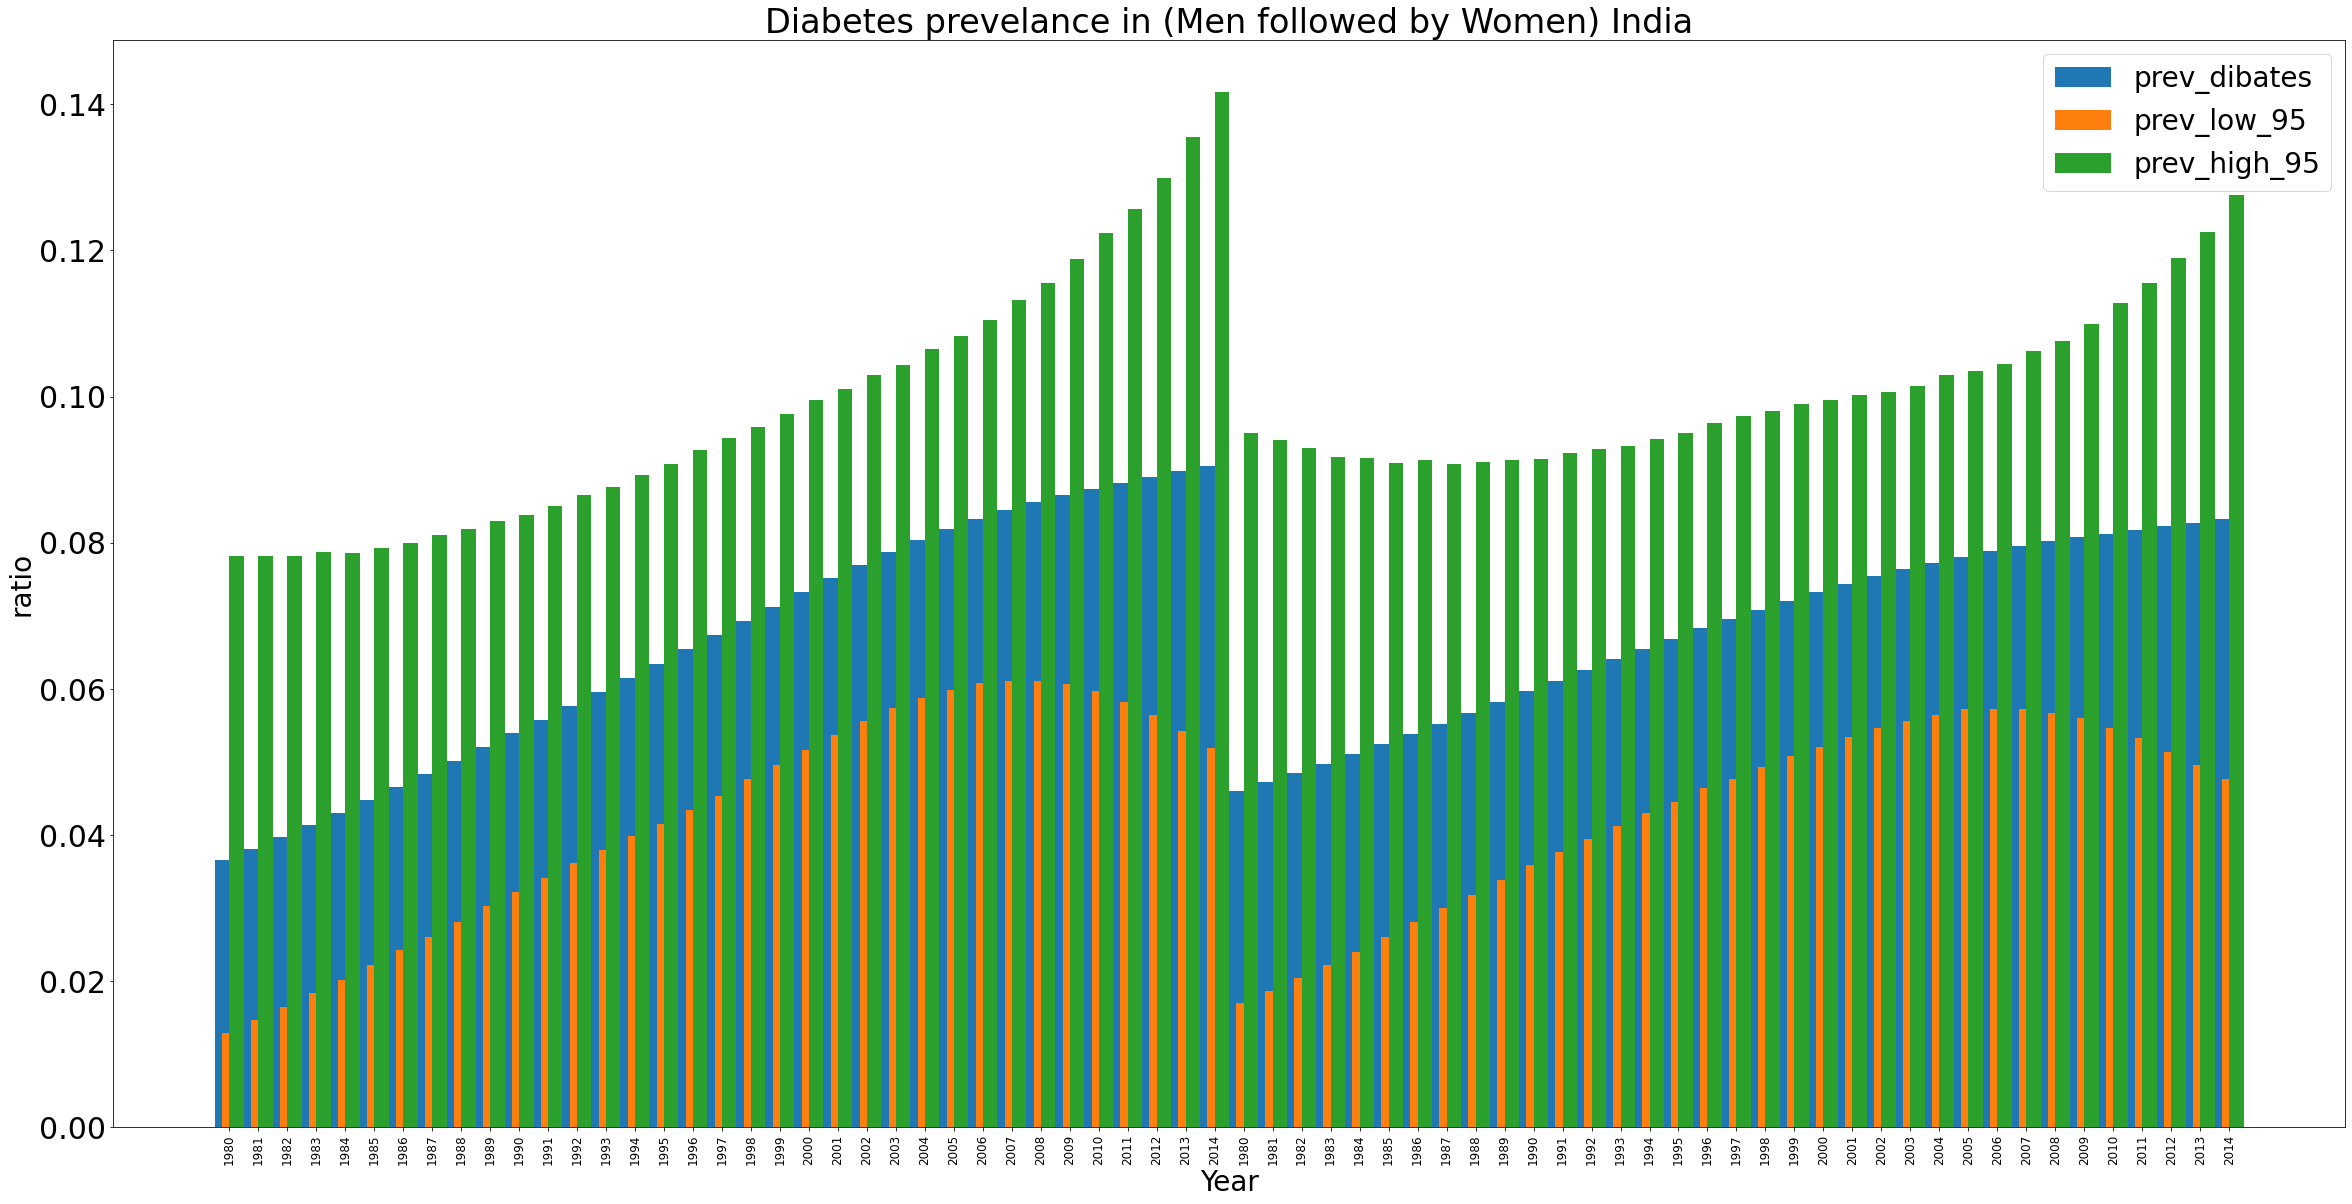

In [16]:
## Visualisation

df = Diabetes_Countires_Wise_country_specific
        
    

labels = df['Year']
prev_dibates = df['Age-standardised diabetes prevalence']
prev_low_95 = df['Lower 95% uncertainty interval']
prev_high_95 = df['Upper 95% uncertainty interval']
        
title1 = 'Diabetes prevelance in (Men followed by Women) ' + str(Country_to_look_for)
         
        #high = max(conf)
        #low = min(conf)
        
x = np.arange(len(labels))  # the x label locations 
width = .50  # the width of the bars
fig, ax = plt.subplots(figsize=(40,20))
rects1 = ax.bar(x-width/2, prev_dibates, width, label='prev_dibates')
rects2 = ax.bar(x, prev_low_95, width, label='prev_low_95')
rects3 = ax.bar(x+width/2, prev_high_95, width, label='prev_high_95')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

    
    
plt.show()

## Cleaning Diabetes DATA(Preprocessing)

In [17]:
Diabetes_Countires_Wise = Diabetes_Countires_Wise.drop(['ISO'], axis=1)
Diabetes_Countires_Wise = Diabetes_Countires_Wise.replace('Macedonia (TFYR)', 'North Macedonia')
Diabetes_Countires_Wise = Diabetes_Countires_Wise.replace('United States of America', 'US')

In [18]:
## Column match

print('-----------------------------------------------------------------')

countries = ['Afghanistan','Italy' , 'Kuwait', 'India', 'South Africa' ,'US', 
             'United Kingdom','Sri Lanka', 'Chile' , 'Norway', 'New Zealand' ,'Switzerland', 
'Australia', 'Canada', 'China','Slovenia','North Macedonia']
k = 0

match = []
for i in set(Diabetes_Countires_Wise.loc[:,'Country']):
    if(i in countries):
        k +=1
        match.append(i)
        print(i)
        
print(k)
print("-------Not Matching --------------------")
for i in countries:
    if(i not in match ):
        print(i)

-----------------------------------------------------------------
Australia
Italy
United Kingdom
Kuwait
Slovenia
North Macedonia
India
New Zealand
Sri Lanka
Canada
Switzerland
Afghanistan
Chile
US
China
South Africa
Norway
17
-------Not Matching --------------------


In [19]:
Diabetes_Countires_Wise

,Country,Sex,Year,Age-standardised diabetes prevalence,Lower 95% uncertainty interval,Upper 95% uncertainty interval
0,Afghanistan,Men,1980,0.044712,0.015339,0.094918
1,Afghanistan,Men,1981,0.046114,0.016883,0.093777
2,Afghanistan,Men,1982,0.047601,0.018745,0.094018
3,Afghanistan,Men,1983,0.049173,0.020375,0.093950
4,Afghanistan,Men,1984,0.050834,0.022269,0.093679
...,...,...,...,...,...,...
13995,Zimbabwe,Women,2010,0.072249,0.043879,0.108806
13996,Zimbabwe,Women,2011,0.072956,0.042840,0.112512
13997,Zimbabwe,Women,2012,0.073752,0.041895,0.116488
13998,Zimbabwe,Women,2013,0.074616,0.040434,0.121880


##  Writing the cleaned data in Cleaned Folder

In [20]:
Diabetes_Countires_Wise.to_csv('../Pre_Processed_Data/Diabetes_Countires_Wise_Processed.csv')

## Visualisation After Cleaning 

In [ ]:
## Visualisation

df = Diabetes_Countires_Wise_country_specific
        
    

labels = df['Year']
prev_dibates = df['Age-standardised diabetes prevalence']
prev_low_95 = df['Lower 95% uncertainty interval']
prev_high_95 = df['Upper 95% uncertainty interval']
        
title1 = 'Diabetes prevelance in (Men followed by Women) ' + str(Country_to_look_for)
         
        #high = max(conf)
        #low = min(conf)
        
x = np.arange(len(labels))  # the x label locations 
width = .50  # the width of the bars
fig, ax = plt.subplots(figsize=(40,20))
rects1 = ax.bar(x-width/2, prev_dibates, width, label='prev_dibates')
rects2 = ax.bar(x, prev_low_95, width, label='prev_low_95')
rects3 = ax.bar(x+width/2, prev_high_95, width, label='prev_high_95')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

    
    
plt.show()